# Abrir imagem DICOM e converte-la em np.array

In [2]:
# Bibliotecas
import pandas as pd
import pydicom
import csv
import matplotlib.pylab as plt
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

Os primeiros comando são destinados a abertura do CSV para entender melhor o Dataset trabalhado

In [3]:
# Abertura de arquivos DICOM

dados = pd.read_csv('D:/kaggle2/traincsv/train.csv')
dados.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [4]:
dados['class_name'].value_counts()

No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: class_name, dtype: int64

In [14]:
# Encontrar as informações referentes a uma determinada imagem
dados.loc[(dados["image_id"] == '051132a778e61a86eb147c7c6f564dfe')]

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
14243,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R8,1305.0,731.0,1613.0,1066.0
14348,051132a778e61a86eb147c7c6f564dfe,Cardiomegaly,3,R8,948.0,1267.0,2063.0,1672.0
28273,051132a778e61a86eb147c7c6f564dfe,Cardiomegaly,3,R9,962.0,1331.0,2035.0,1624.0
35738,051132a778e61a86eb147c7c6f564dfe,Pleural thickening,11,R9,1592.0,452.0,1804.0,604.0
61311,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R9,1275.0,729.0,1612.0,1066.0
64304,051132a778e61a86eb147c7c6f564dfe,Cardiomegaly,3,R10,952.0,1317.0,2033.0,1723.0


c:\users\madeira\appdata\local\programs\python\python38-32\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:176: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


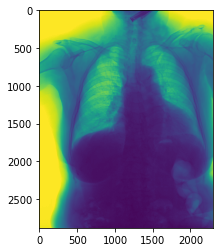

In [15]:
# Abrir a imagem em DICOM
image_path = 'D:/kaggle2/train/051132a778e61a86eb147c7c6f564dfe.dicom'
ds = pydicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

Converter dados DICOM para PNG/JPG pode parecer simples e haverá muitos notebooks fazendo isso de maneira simples - apenas redimensionando.

No entanto, você deve considerar que os dados DICOM brutos não podem ser linearmente convertidos em um PNG/JPG "amigável para humanos". Na verdade, a maioria dos valores de pixel do DICOM armazenam em escala exponencial, que é resolvida por visualizadores DICOM padrão.

Portanto, para obter PNG/JPG como os radiologistas veriam inicialmente em seu espaço de trabalho, é necessário aplicar algumas transformações. Os metadados DICOM armazenam informações sobre como fazer essas transformações "amigáveis ao ser humano".

Essa parte do notebook foi obtido em:
https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way

In [7]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [ ]:
def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    
    return im

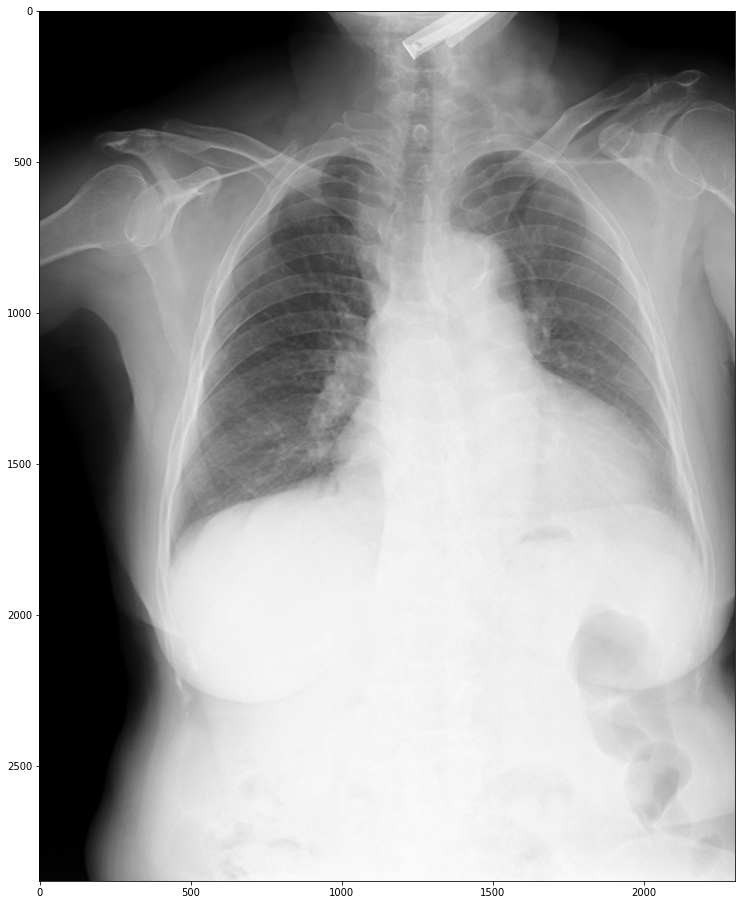

In [8]:
img = read_xray('D:/kaggle2/train/051132a778e61a86eb147c7c6f564dfe.dicom')
plt.figure(figsize = (16,16))
plt.imshow(img, 'gray')

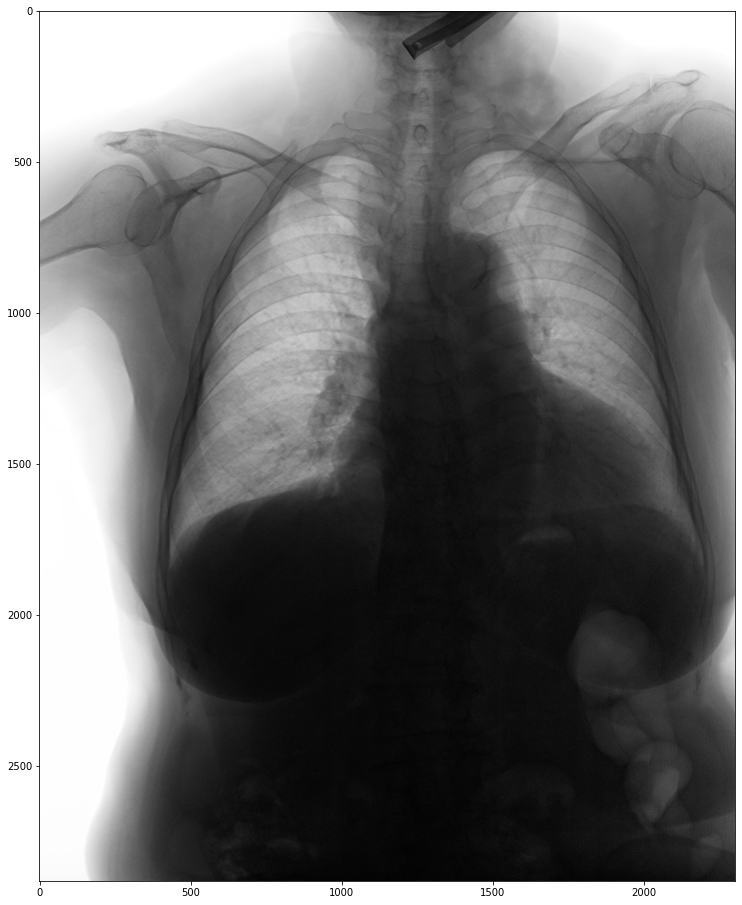

In [9]:
img = read_xray('D:/kaggle2/train/051132a778e61a86eb147c7c6f564dfe.dicom', fix_monochrome = False)
plt.figure(figsize = (16,16))
plt.imshow(img, 'gray')

In [12]:
id_img = '051132a778e61a86eb147c7c6f564dfe'
res = dados.loc[(dados['image_id'] == id_img)]

In [13]:

def rotacionar()
ponto = (largura / 2, altura / 2) #ponto no centro da figura
rotacao = cv2.getRotationMatrix2D(ponto, 45, 1.0)
rotacionado = cv2.warpAffine(imagem, rotacao, (largura, altura))
cv2.imshow("Rotacionado 45 graus", rotacionado)
 
cv2.waitKey(0)
 
rotacao = cv2.getRotationMatrix2D(ponto, 120, 1.0)
rotacionado = cv2.warpAffine(imagem, rotacao, (largura, altura))
cv2.imshow("Rotacionado 120 graus", rotacionado)
 
cv2.waitKey(0)

0
0
3
3
11
0
3


In [ ]:
função para redimensionar as imagens do banco de dados
def reduzir_tamanho_imagens(input_dir, output_dir):
    lista_de_arquivos = os.listdir(input_dir)
   for nome in lista_de_arquivos:
        imag = Image.open(os.path.join(input_dir, nome))
        redimensionada = imag.resize((500,500))
        redimensionada.save(os.path.join(outout_dir, nome))

In [ ]:
def escrever(arquivo, linha):
    with open(arquivo, 'a', newline='') as file:
    
        writer = csv.writer(file)
    
        writer.writerow(["Pressao", "Temperatura", "Umidade"])